In [70]:
from neural_priors.utils.data import Subject
import seaborn as sns
import pandas as pd

In [71]:
subjects = ['01', '02', '03', '04', '05', '06', '07']

df = []
for subject in subjects:
    sub = Subject(subject)
    df.append(sub.get_behavioral_data(add_info=True))

df = pd.concat(df)

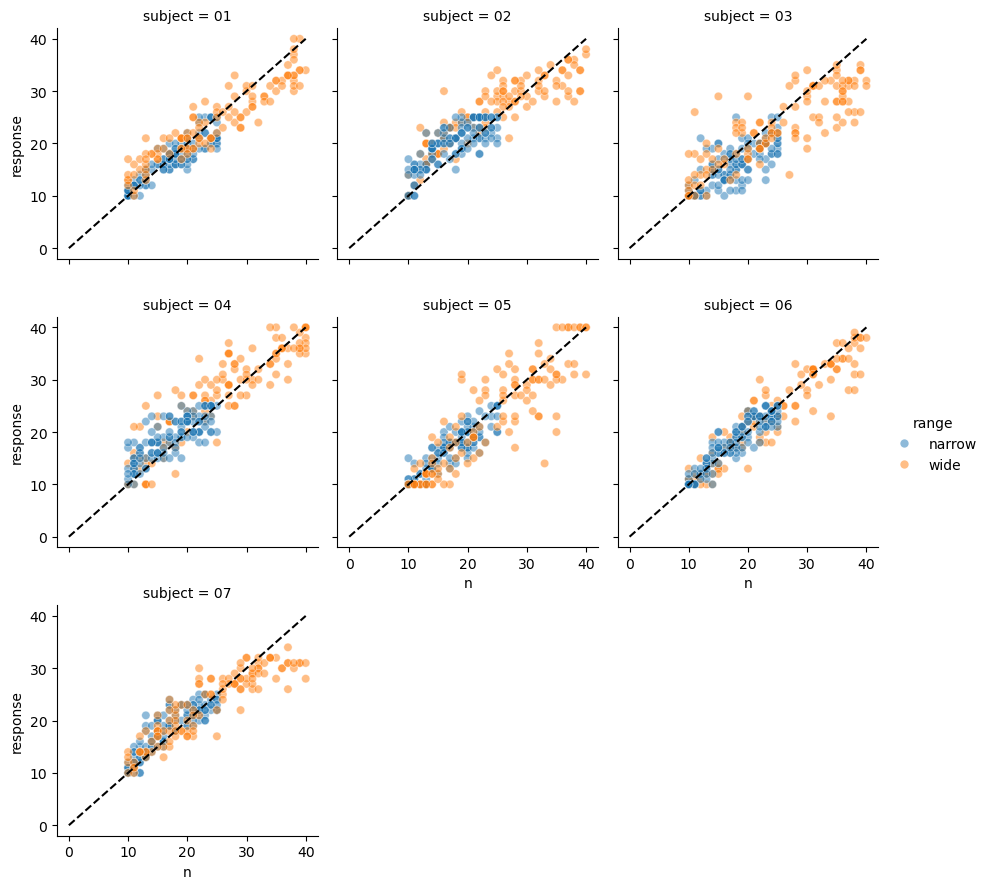

In [72]:
import matplotlib.pyplot as plt

g = sns.relplot(x='n', y='response', data=df.xs('estimation_task', 0, 'task').reset_index(), col='subject', hue='range', hue_order=['narrow', 'wide'], col_wrap=3, height=3., alpha=.5)

for ax in g.axes.ravel():
    ax.plot([0, 40], [0, 40], c='k', ls='--')

Text(0.5, 1.05, 'Bias')

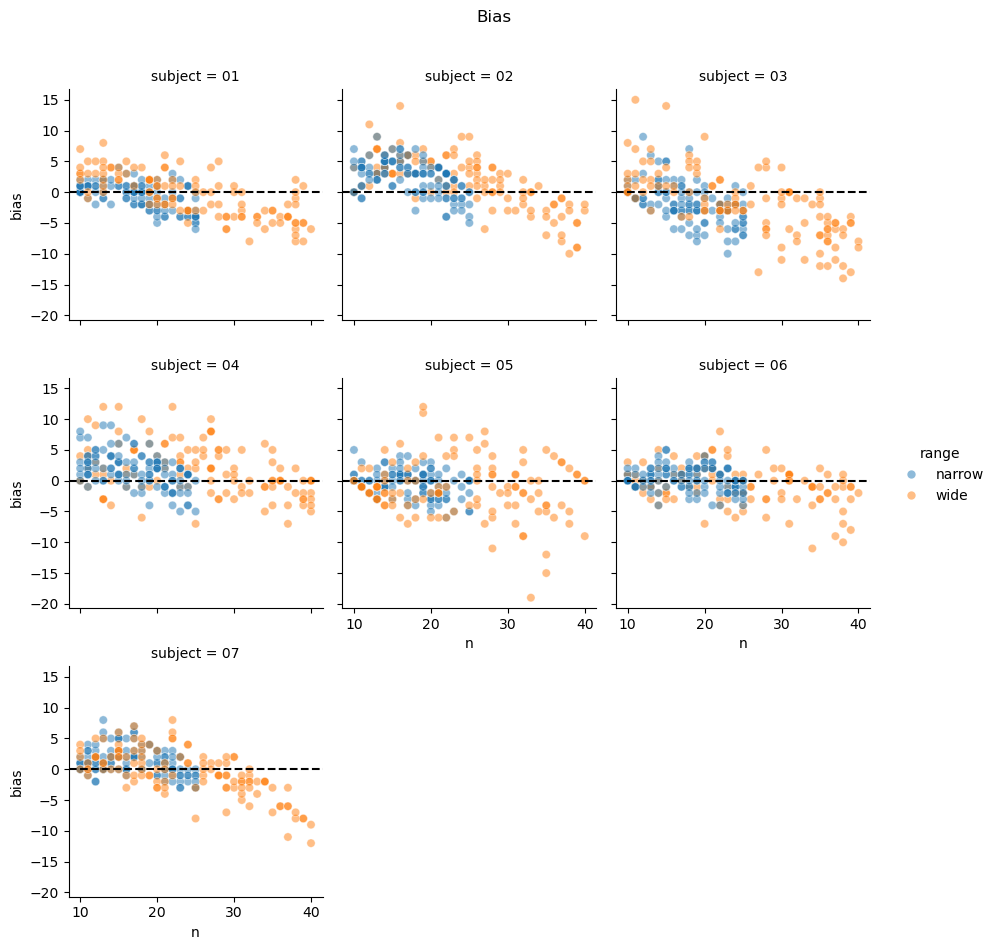

In [73]:
import matplotlib.pyplot as plt

df['bias'] = df['response'] - df['n']

g = sns.relplot(x='n', y='bias', data=df.xs('estimation_task', 0, 'task').reset_index(), col='subject', hue='range', hue_order=['narrow', 'wide'], col_wrap=3, height=3., alpha=.5)
g.map(plt.axhline, y=0, ls='--', c='k')
g.fig.suptitle('Bias', y=1.05)

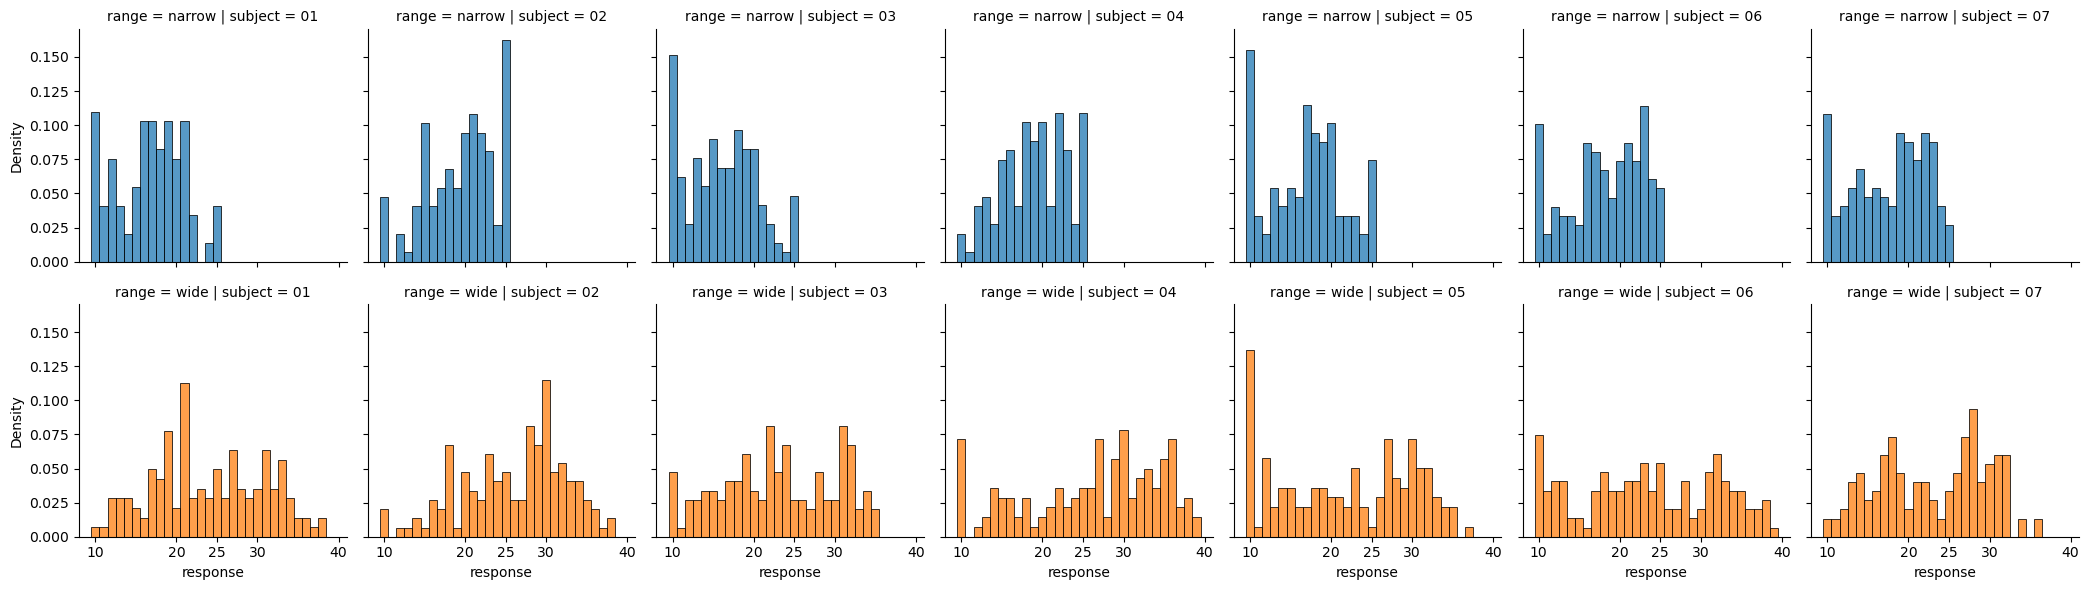

In [86]:
import numpy as np
g = sns.FacetGrid(df.reset_index(), row='range', hue='range', col='subject')

g.map(sns.histplot, 'response', bins=np.arange(9.5, 40.5, 1), stat='density')

g.set(xticks=[10, 20, 25, 30, 40])

Text(0.5, 0.98, 'Average bias (rolling mean, window=5)')

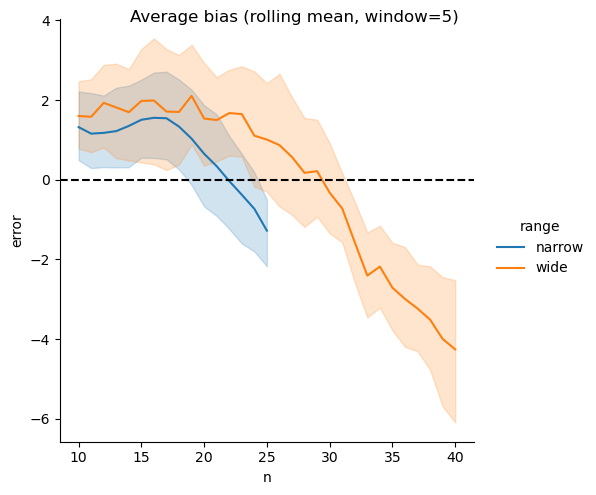

In [87]:
tmp = df.xs('estimation_task', 0, 'task').groupby(['subject', 'range', 'n'])['error'].mean().groupby(['subject', 'range']).apply(lambda d: d.rolling(5, min_periods=1).mean().droplevel([0,1]))

g = sns.relplot(x='n', y='error', hue='range', data=tmp.reset_index(), kind='line')

g.map(plt.axhline, y=0, ls='--', c='k')

g.fig.suptitle('Average bias (rolling mean, window=5)')

Text(0.5, 0.98, 'Average bias (rolling mean, window=5)')

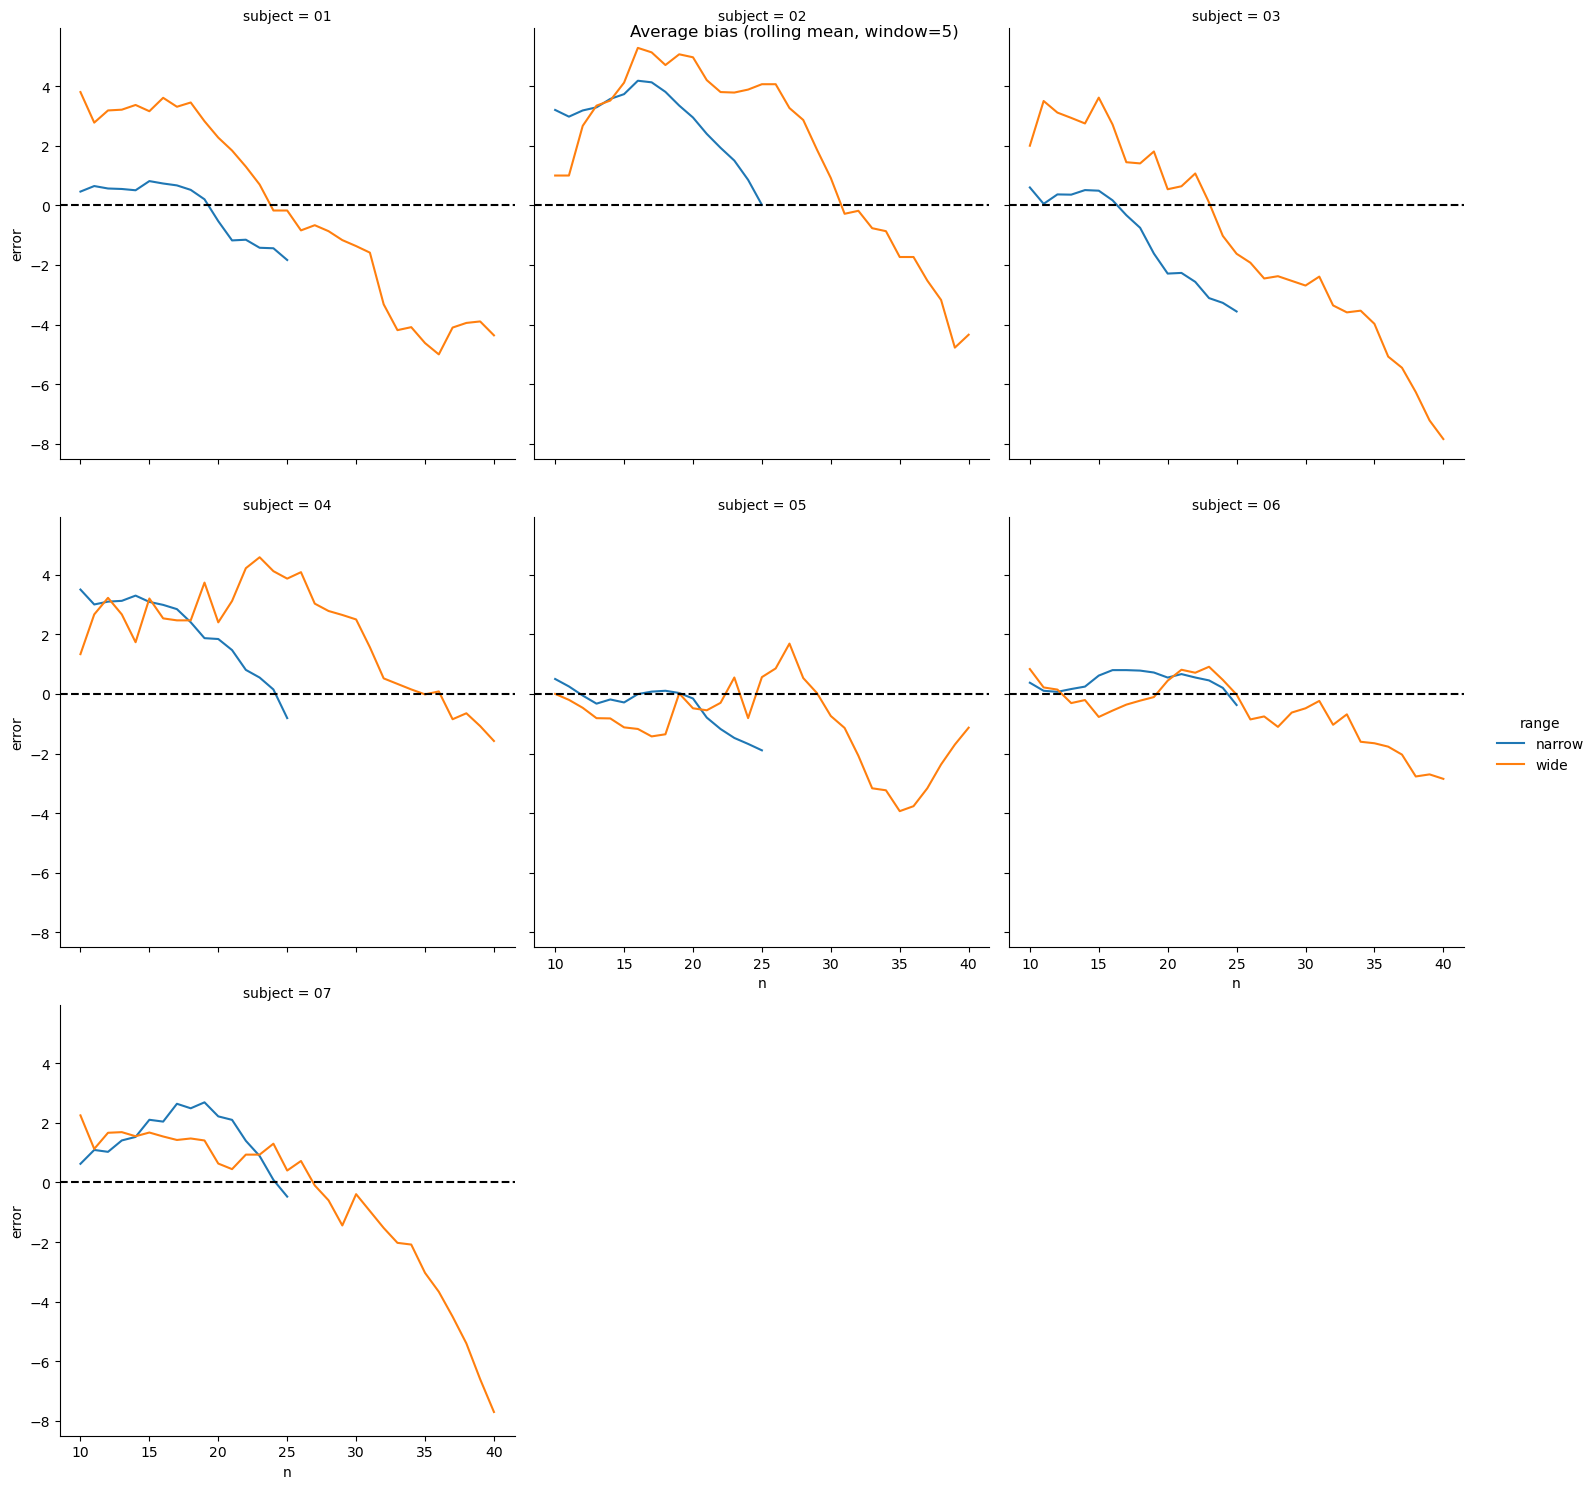

In [81]:
tmp = df.xs('estimation_task', 0, 'task').groupby(['subject', 'range', 'n'])['error'].mean().groupby(['subject', 'range']).apply(lambda d: d.rolling(5, min_periods=1).mean().droplevel([0,1]))

g = sns.relplot(x='n', y='error', hue='range', col='subject', col_wrap=3, data=tmp.reset_index(), kind='line')

g.map(plt.axhline, y=0, ls='--', c='k')

g.fig.suptitle('Average bias (rolling mean, window=5)')

In [82]:
rolling_window = 5

Text(0.5, 1.05, 'Standard deviation of responses (rolling mean, window=5)')

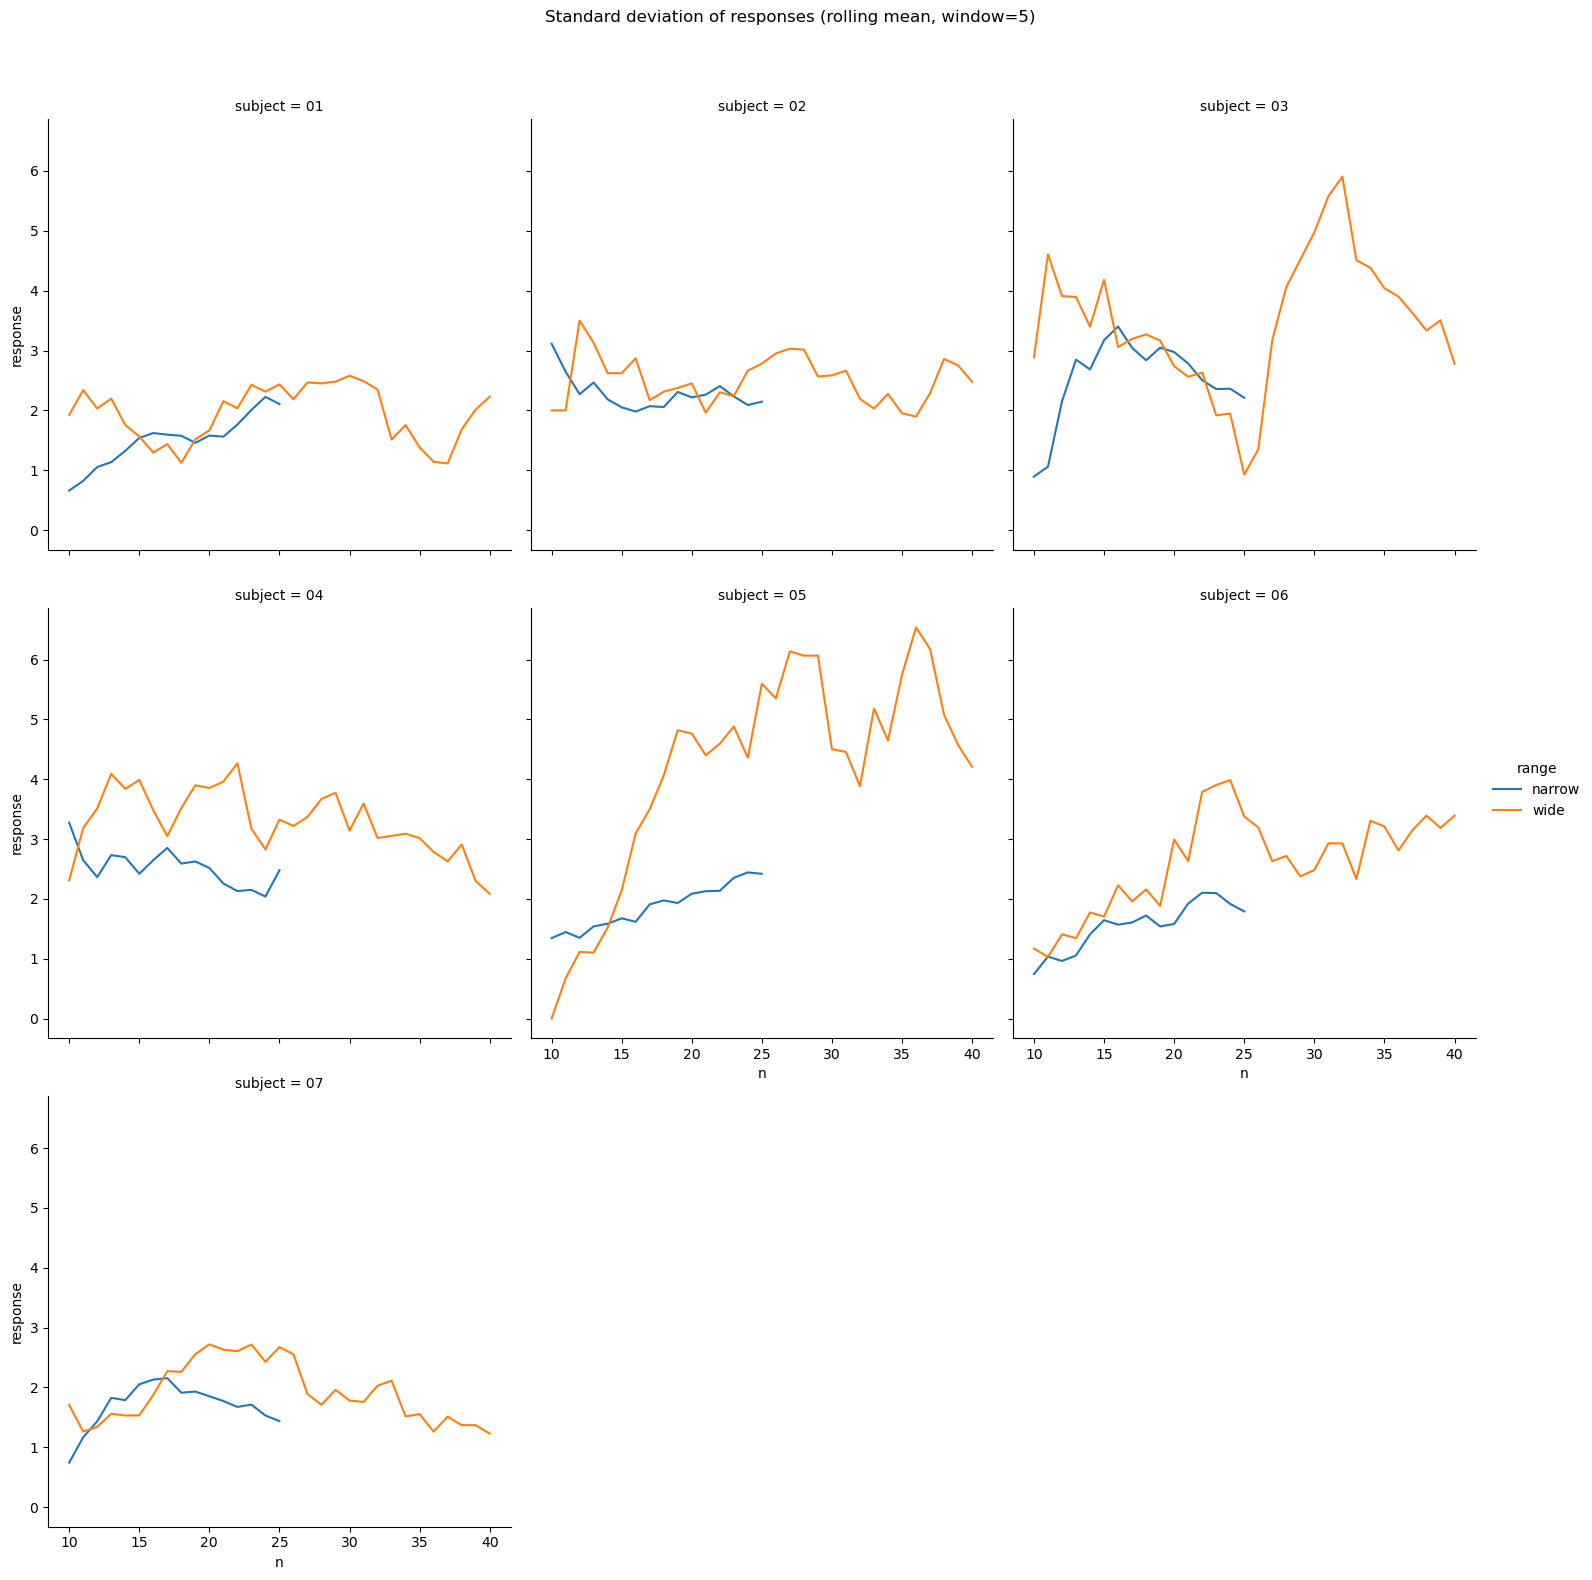

In [83]:
df_std = df.xs('estimation_task', 0, 'task').groupby(['subject', 'range', 'n'], as_index=True)['response'].std().groupby(['subject', 'range']).apply(lambda d: d.rolling(rolling_window, min_periods=1).mean().droplevel([0, 1]))


g = sns.relplot(x='n', y='response', hue='range', data=df_std.to_frame().reset_index(), col='subject', col_wrap=3, kind='line')
g.fig.suptitle('Standard deviation of responses (rolling mean, window=5)', y=1.05)

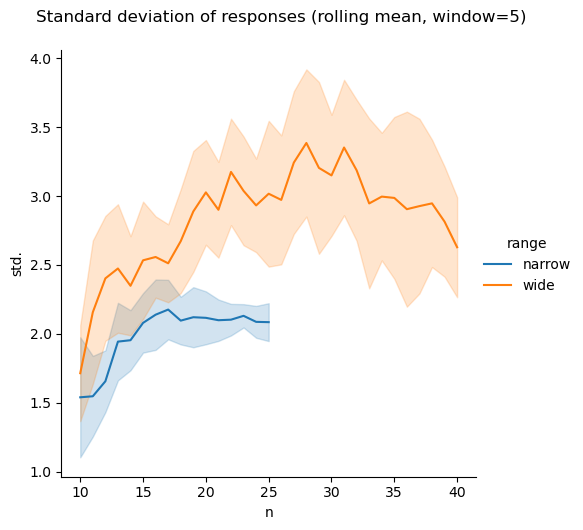

In [88]:
rolling_window = 10
# .apply(lambda d: d['bias'].rolling(rolling_window).mean()).to_frame().droplevel([2, 3])


g = sns.relplot(x='n', y='response', hue='range', data=df_std.reset_index(), kind='line', errorbar='se')

# g.set_titles('Standard deviation of responses')
g.fig.suptitle('Standard deviation of responses (rolling mean, window=5)', y=1.05)
g.set_ylabels('std.')

Text(0.5, 0.98, 'Average Absolute Error (rolling mean, window=5)')

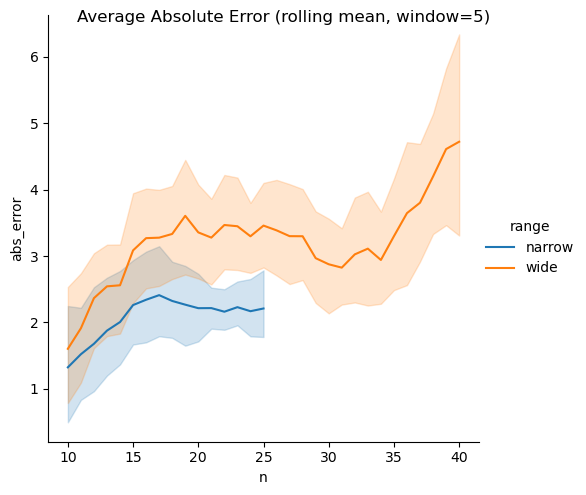

In [85]:
tmp = df.xs('estimation_task', level='task').groupby(['subject', 'range', 'n'])['abs_error'].mean().groupby(['subject', 'range']).apply(lambda d: d.rolling(5, min_periods=1).mean().droplevel([0,1]))

g = sns.relplot(x='n', y='abs_error', hue='range', data=tmp.reset_index(), kind='line')
g.fig.suptitle('Average Absolute Error (rolling mean, window=5)')


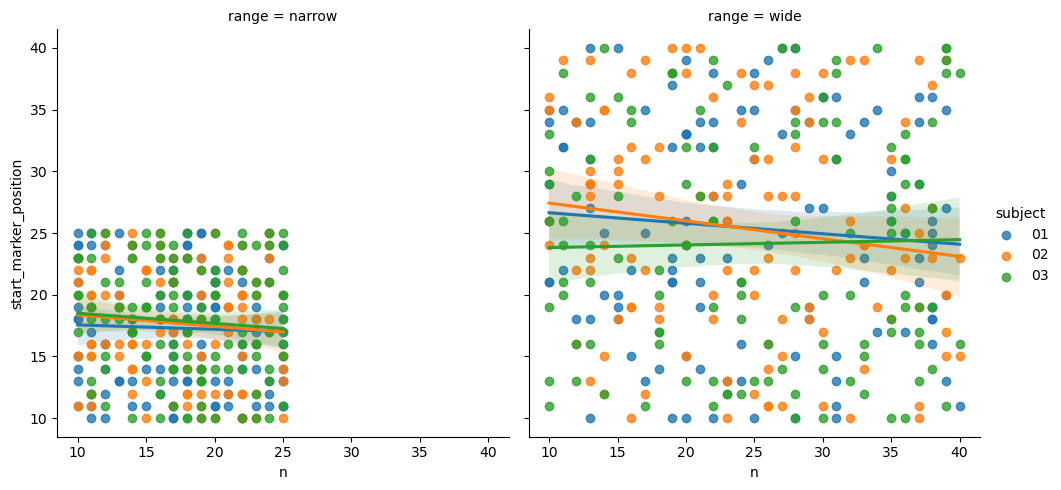

In [15]:
sns.lmplot(x='n', y='start_marker_position', data=df.reset_index(), hue='subject', col='range')

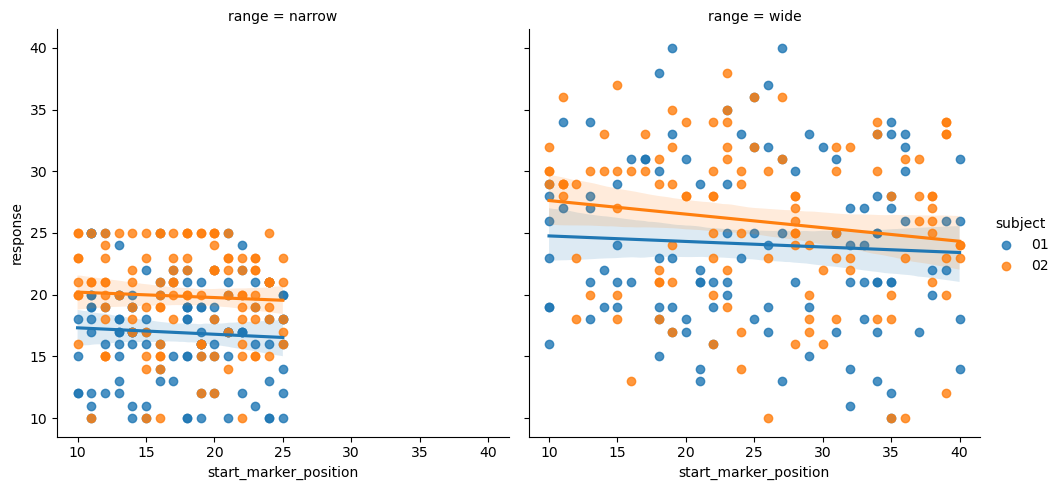

In [10]:
sns.lmplot(x='start_marker_position', y='response', data=df.reset_index(), hue='subject', col='range')

In [14]:
df['marker_moved'] = (df['response'] - df['start_marker_position']).abs()

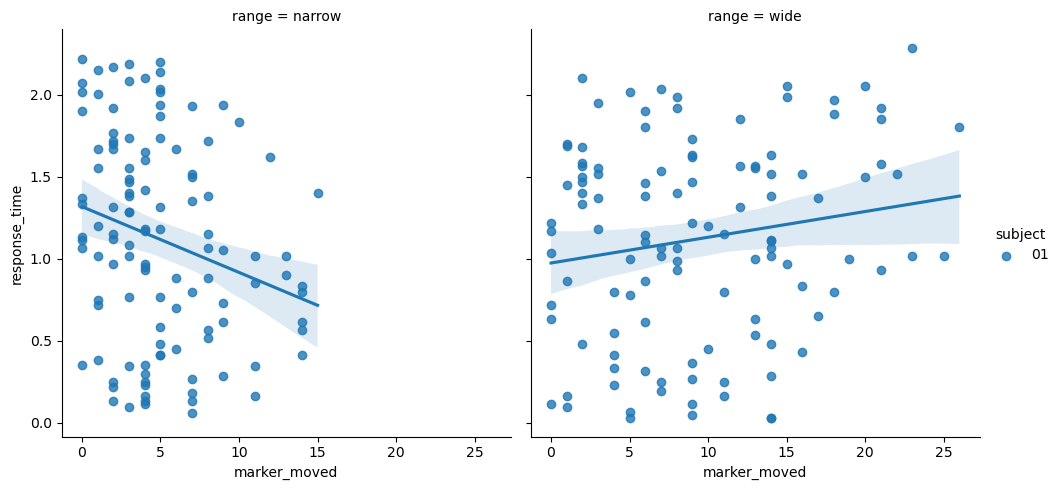

In [15]:
sns.lmplot(x='marker_moved', y='response_time', data=df.reset_index(), hue='subject', col='range')

Text(0.5, 1.05, 'Standard deviation of responses (rolling mean, window=5)')

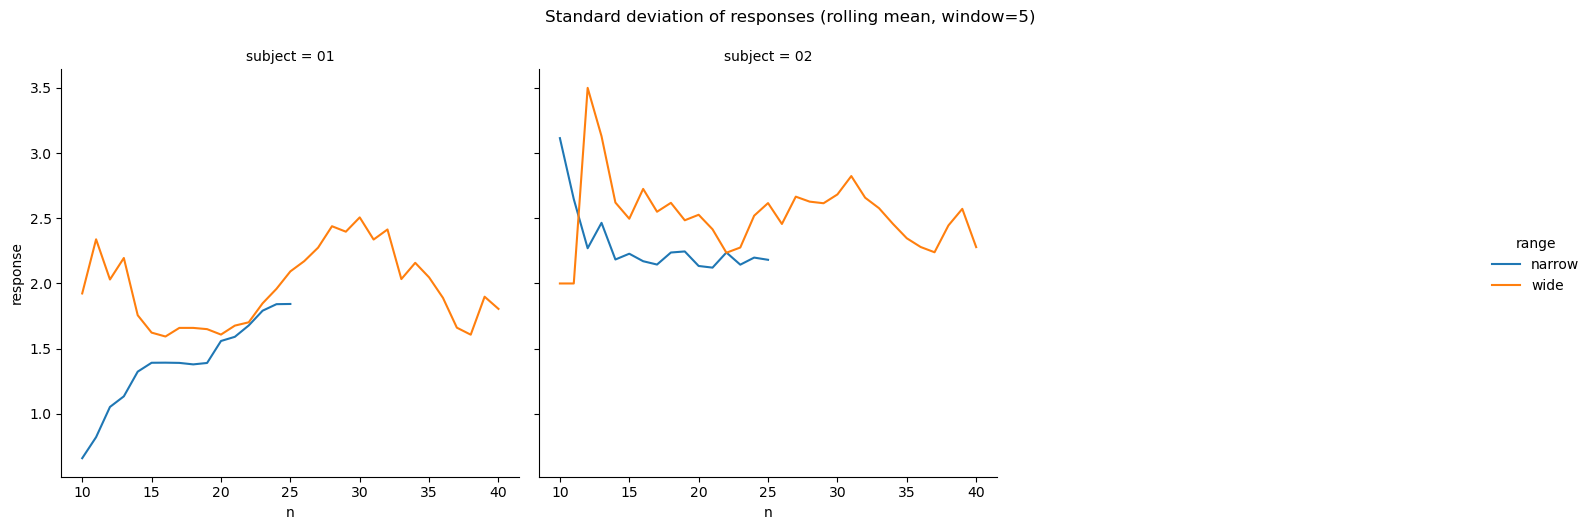

In [32]:
df.to_csv('/data/ds-neuralpriors/sourcedata/behavior_pilots.tsv', sep='\t')

In [20]:
no_response_penalty = 0.1
max_reward = 0.07
reward_slope = 1./600.

In [21]:
def get_score(d, include_no_response_penalty=True):

    squared_error = d['error']**2
    reward = max_reward - reward_slope * squared_error

    reward = reward.sum()

    if include_no_response_penalty:
        reward -= no_response_penalty * d.response.isnull().sum()

    return reward

In [24]:
df.groupby(['subject', 'task', 'range']).apply(get_score, include_no_response_penalty=True)

subject  task             range 
01       estimation_task  narrow    6.816667
                          wide      4.830000
         feedback         narrow    1.685000
                          wide      1.528333
dtype: float64

In [25]:
df.groupby(['subject']).apply(get_score, include_no_response_penalty=True)

subject
01    14.86
dtype: float64

In [26]:
df['bias'] = df['response'] - df['n']

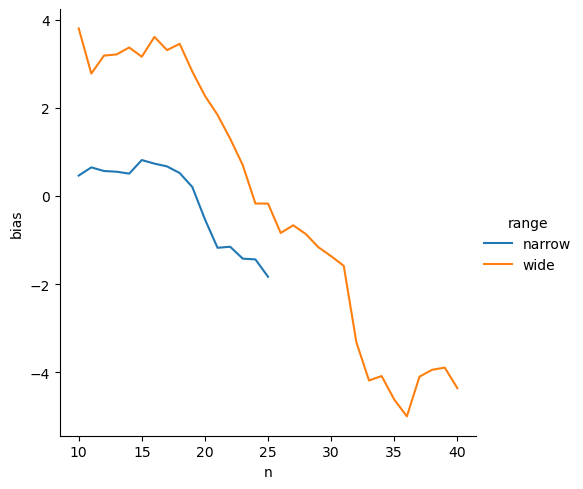

In [27]:
rolling_window = 5
bias = df.xs('estimation_task', 0, 'task').groupby(['subject', 'range', 'n'], as_index=True)['bias'].mean().groupby(['subject', 'range']).apply(lambda d: d.rolling(5, min_periods=1).mean().droplevel([0, 1]))
# .apply(lambda d: d['bias'].rolling(rolling_window).mean()).to_frame().droplevel([2, 3])


sns.relplot(x='n', y='bias', hue='range', data=bias.reset_index(), kind='line')

In [28]:
df.xs('estimation_task', 0, 'task').groupby(['subject', 'range', 'n'], as_index=True)['response'].std().isnull().any()

True

Text(0.5, 0.98, 'Standard deviation of responses')

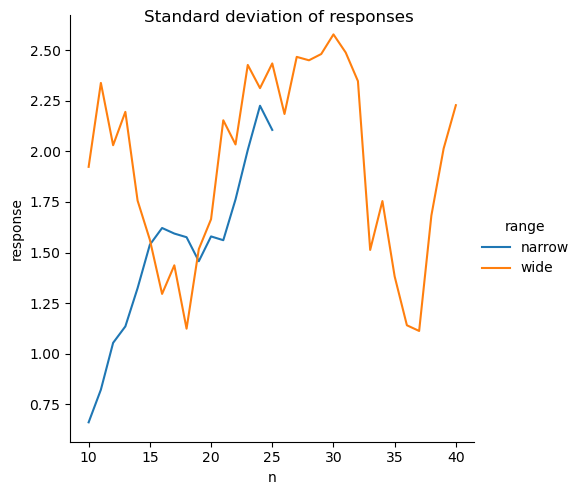

In [29]:
rolling_window = 5
df_std = df.xs('estimation_task', 0, 'task').groupby(['subject', 'range', 'n'], as_index=True)['response'].std().groupby(['subject', 'range']).apply(lambda d: d.rolling(rolling_window, min_periods=1).mean().droplevel([0, 1]))
# .apply(lambda d: d['bias'].rolling(rolling_window).mean()).to_frame().droplevel([2, 3])


g = sns.relplot(x='n', y='response', hue='range', data=df_std.reset_index(), kind='line', errorbar='se')

# g.set_titles('Standard deviation of responses')
g.fig.suptitle('Standard deviation of responses')

In [36]:
subjects = ['alina', 'gy', 'saurabh', 'gilles3', 'ella', 'maike']

df = []
for subject in subjects:
    sub = Subject(subject)
    df.append(sub.get_behavioral_data(raw=True, add_info=False))

df = pd.concat(df)

Problem with feedback run 5: [Errno 2] No such file or directory: '/data/ds-neuralpriors/sourcedata/behavior/sub-gy/ses-1/sub-gy_ses-1_task-feedback_run-5_events.tsv'
Problem with estimation_task run 4: 'n'


In [50]:
df

trial_nr       onset  phase  \
subject task            run     event_type                                 
alina   feedback        1   0   instruction         0    0.080759      0   
                            1   instruction         0    0.508164      1   
                            2   instruction         0    8.865814      0   
                            3   instruction         0    9.366346      1   
                            4   fixation1           1   13.486775      0   
...                                               ...         ...    ...   
maike   estimation_task 8   221 response           30  293.893632      4   
                            222 feedback           30  295.903438      5   
                            223 iti                30  296.406382      6   
                            224 outro               0  297.402637      0   
                            225 response            0  299.888676      0   

                                            response  nr_frames     n  \
subject task            run     event_type                              
alina   feedback        1   0   instruction      NaN       26.0   NaN   
                            1   instruction      NaN      501.0   NaN   
                            2   instruction      NaN       30.0   NaN   
                            3   instruction      NaN      247.0   NaN   
                            4   fixation1        NaN       18.0  17.0   
...                                              ...        ...   ...   
maike   estimation_task 8   221 response         NaN      479.0  18.0   
                            222 feedback          18       60.0  18.0   
                            223 iti               18      119.0  18.0   
                            224 outro            NaN      298.0   NaN   
                            225 response       space        NaN   NaN   

                                              onset_abs  duration   range  \
subject task            run     event_type                                  
alina   feedback        1   0   instruction    7.431743  0.427405  narrow   
                            1   instruction    7.859148  8.357650  narrow   
                            2   instruction   16.216798  0.500532  narrow   
                            3   instruction   16.717330  4.120429  narrow   
                            4   fixation1     20.837759  0.300276  narrow   
...                                                 ...       ...     ...   
maike   estimation_task 8   221 response     296.417781       NaN  narrow   
                            222 feedback     298.427588  0.502944  narrow   
                            223 iti          298.930531  0.996255  narrow   
                            224 outro        299.926787  2.491671  narrow   
                            225 response     302.412826       NaN  narrow   

                                             jitter  start_marker_position  \
subject task            run     event_type                                   
alina   feedback        1   0   instruction     NaN                    NaN   
                            1   instruction     NaN                    NaN   
                            2   instruction     NaN                    NaN   
                            3   instruction     NaN                    NaN   
                            4   fixation1       NaN                    NaN   
...                                             ...                    ...   
maike   estimation_task 8   221 response        4.0                   23.0   
                            222 feedback        4.0                   23.0   
                            223 iti             4.0                   23.0   
                            224 outro           NaN                    NaN   
                            225 response        NaN                    NaN   

                                             response_time  
subject task            run 

In [52]:
onsets.index.unique(level='event_type')

Index(['instruction', 'trigger_1', 'pulse', 'trigger_2', 'trigger_3',
       'trigger_4', 'fixation1', 'fixation2', 'stimulus', 'jitter', 'response',
       'feedback', 'iti', 'outro', 'get_score', 'score'],
      dtype='object', name='event_type')

In [98]:
onsets = df.xs('estimation_task', 0, 'task').loc['alina']

start_onset = onsets.groupby('run').apply(lambda d: d.xs('pulse', 0, 'event_type')['onset'].iloc[0])

onsets['onset'] = onsets['onset'] - start_onset.loc[onsets.index.get_level_values('run')].values
onsets = onsets[onsets['onset'] >= 0.0]

onsets1 = onsets.xs('stimulus', 0, 'event_type')
onsets2 = onsets.xs('response', 0, 'event_type')


onsets = pd.concat((onsets1[['onset']], onsets2[['onset']]), keys=['stimulus', 'response'], names=['trial_type'])
onsets['duration'] = 0.0

In [103]:
from nilearn.glm.first_level import make_first_level_design_matrix
import numpy as np

tr = 2.298 
frametimes = np.arange(tr/2., 131.5*tr)


X = make_first_level_design_matrix(frametimes, onsets.xs(1, 0, 'run').reset_index(), drift_model=None, hrf_model='spm', oversampling=50).iloc[:, :2]

/Users/gdehol/mambaforge/lib/python3.10/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `level_1` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/Users/gdehol/mambaforge/lib/python3.10/site-packages/nilearn/glm/first_level/experimental_paradigm.py:113: FutureWarning: The provided callable <function sum at 0x104f82440> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  COLUMN_DEFINING_EVENT_IDENTITY, sort=False).agg(STRATEGY).reset_index()


In [109]:
onsets.groupby("run").apply(lambda d: d.sort_values('onset'))

onset  duration
run trial_type run                          
1   stimulus   1   14     7.540085       0.0
    response   1   18    13.128442       0.0
    stimulus   1   25    17.249009       0.0
    response   1   29    21.853220       0.0
    stimulus   1   36    25.973750       0.0
...                            ...       ...
8   stimulus   8   328  278.790696       0.0
    response   8   333  285.380098       0.0
    stimulus   8   339  289.517142       0.0
    response   8   344  295.122467       0.0
                   350  303.213473       0.0

[487 rows x 2 columns]

In [110]:
df

trial_nr       onset  phase  \
subject task            run     event_type                                 
alina   feedback        1   0   instruction         0    0.080759      0   
                            1   instruction         0    0.508164      1   
                            2   instruction         0    8.865814      0   
                            3   instruction         0    9.366346      1   
                            4   fixation1           1   13.486775      0   
...                                               ...         ...    ...   
maike   estimation_task 8   221 response           30  293.893632      4   
                            222 feedback           30  295.903438      5   
                            223 iti                30  296.406382      6   
                            224 outro               0  297.402637      0   
                            225 response            0  299.888676      0   

                                            response  nr_frames     n  \
subject task            run     event_type                              
alina   feedback        1   0   instruction      NaN       26.0   NaN   
                            1   instruction      NaN      501.0   NaN   
                            2   instruction      NaN       30.0   NaN   
                            3   instruction      NaN      247.0   NaN   
                            4   fixation1        NaN       18.0  17.0   
...                                              ...        ...   ...   
maike   estimation_task 8   221 response         NaN      479.0  18.0   
                            222 feedback          18       60.0  18.0   
                            223 iti               18      119.0  18.0   
                            224 outro            NaN      298.0   NaN   
                            225 response       space        NaN   NaN   

                                              onset_abs  duration   range  \
subject task            run     event_type                                  
alina   feedback        1   0   instruction    7.431743  0.427405  narrow   
                            1   instruction    7.859148  8.357650  narrow   
                            2   instruction   16.216798  0.500532  narrow   
                            3   instruction   16.717330  4.120429  narrow   
                            4   fixation1     20.837759  0.300276  narrow   
...                                                 ...       ...     ...   
maike   estimation_task 8   221 response     296.417781       NaN  narrow   
                            222 feedback     298.427588  0.502944  narrow   
                            223 iti          298.930531  0.996255  narrow   
                            224 outro        299.926787  2.491671  narrow   
                            225 response     302.412826       NaN  narrow   

                                             jitter  start_marker_position  \
subject task            run     event_type                                   
alina   feedback        1   0   instruction     NaN                    NaN   
                            1   instruction     NaN                    NaN   
                            2   instruction     NaN                    NaN   
                            3   instruction     NaN                    NaN   
                            4   fixation1       NaN                    NaN   
...                                             ...                    ...   
maike   estimation_task 8   221 response        4.0                   23.0   
                            222 feedback        4.0                   23.0   
                            223 iti             4.0                   23.0   
                            224 outro           NaN                    NaN   
                            225 response        NaN                    NaN   

                                             response_time  
subject task            run 

<Axes: xlabel='n', ylabel='Count'>

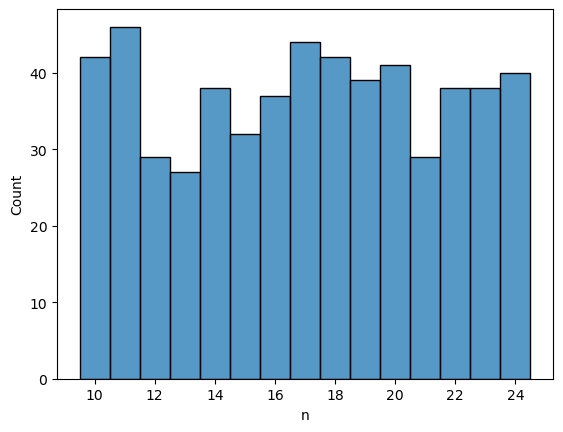

In [56]:
sns.histplot(df[df.range == 'narrow']['n'], bins=np.arange(9.5, 25.5))

<Axes: xlabel='n', ylabel='Count'>

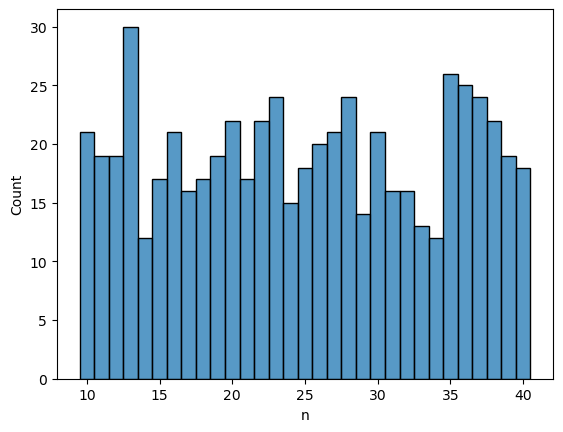

In [68]:
sns.histplot(df[df.range == 'wide']['n'], bins=np.arange(9.5, 41.5))

<Axes: xlabel='response', ylabel='Count'>

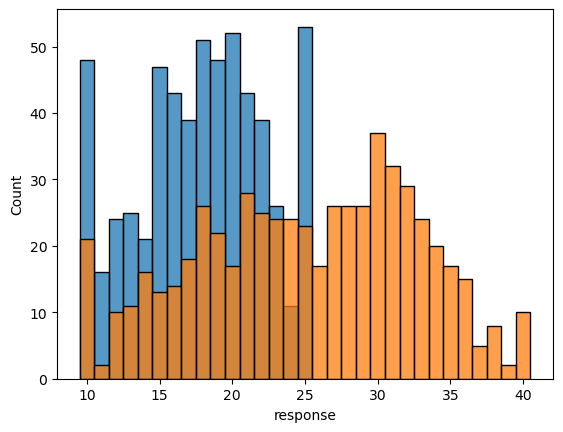

In [69]:
sns.histplot(df[df['range'] == 'narrow']['response'], bins=np.arange(9.5, 26.5))
sns.histplot(df[df['range'] == 'wide']['response'], bins=np.arange(9.5, 41.5))

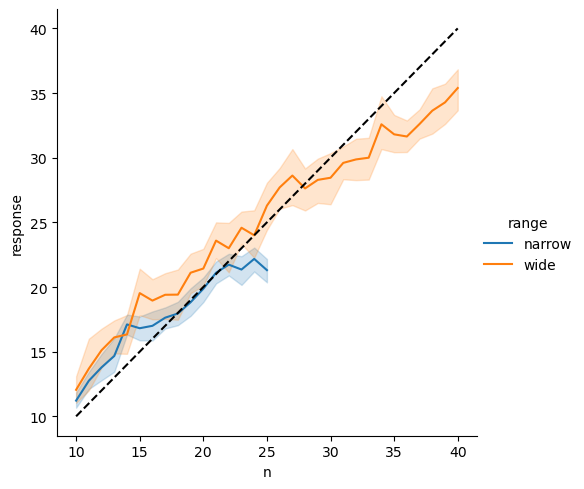

In [65]:
sns.relplot(x='n', y='response', data=df, hue='range', kind='line')
plt.plot([10, 40], [10, 40], c='k', ls='--')